In [1]:
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


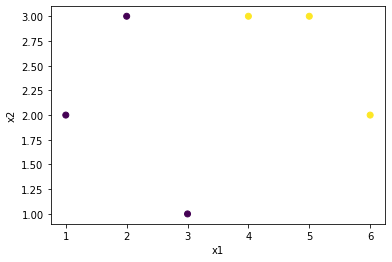

In [2]:
x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x1 = [x[0] for x in x_data]
x2 = [x[1] for x in x_data]

colors = [int(y[0] % 3) for y in y_data]
plt.scatter(x1, x2, c=colors)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
x1

[1, 2, 3, 4, 5, 6]

In [5]:
colors

[0, 0, 0, 1, 1, 1]

In [7]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [8]:
# hypothesis = tf.div(1., 1 + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [9]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [10]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

In [11]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.int32))

In [12]:
test_x1 = [[5,2]]
test_x2 = [[2,2]]

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
      print(step, cost_val)

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy],
                     feed_dict={X:x_data, Y:y_data})
  print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
  print("[5,2] : ", sess.run(predicted, feed_dict={X:test_x1}))
  print("[2,2] : ", sess.run(predicted, feed_dict={X:test_x2}))

0 0.6931472
1000 0.41448987
2000 0.34960732
3000 0.3013888
4000 0.26361895
5000 0.23360117
6000 0.20939068
7000 0.18956773
8000 0.1731015
9000 0.15924038
10000 0.14743067

Hypothesis:  [[0.02987644]
 [0.15765937]
 [0.30070728]
 [0.78328896]
 [0.9407705 ]
 [0.98057085]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1
[5,2] :  [[1.]]
[2,2] :  [[0.]]
